In [23]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

load dataset

In [24]:
data = pd.read_csv("/content/drive/MyDrive/Tasks Datasets/energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [25]:
data.shape


(19735, 29)

In [26]:
# ratio of null values
data.isnull().sum()/data.shape[0] *100

date           0.0
Appliances     0.0
lights         0.0
T1             0.0
RH_1           0.0
T2             0.0
RH_2           0.0
T3             0.0
RH_3           0.0
T4             0.0
RH_4           0.0
T5             0.0
RH_5           0.0
T6             0.0
RH_6           0.0
T7             0.0
RH_7           0.0
T8             0.0
RH_8           0.0
T9             0.0
RH_9           0.0
T_out          0.0
Press_mm_hg    0.0
RH_out         0.0
Windspeed      0.0
Visibility     0.0
Tdewpoint      0.0
rv1            0.0
rv2            0.0
dtype: float64

In [27]:
# Statistical measures of the datasets
data.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [28]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

In [29]:
# drop date columns
data = data.drop(['date'], axis= 1)
data.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


<Axes: >

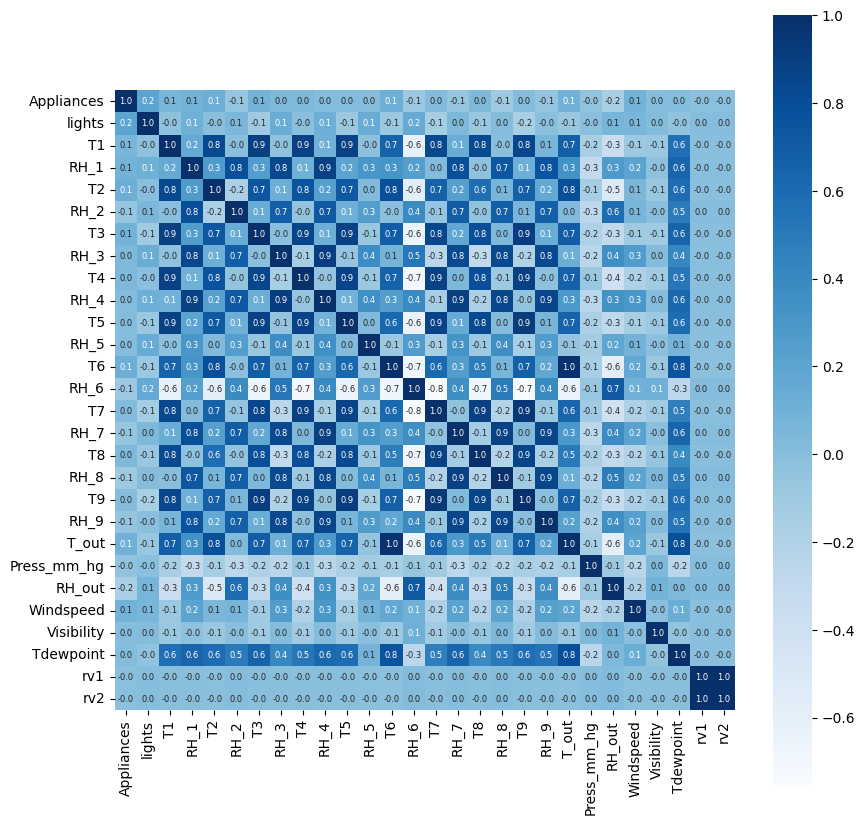

In [30]:
correlation = data.corr()

# Contructing a heatmap to understand correlation
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size': 6}, cmap='Blues')

In [31]:
# Check for infinite values
print(np.isinf(data).sum())


Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64


In [32]:
# Drop the target variables from the input features dataframe
X = data.drop(['rv1', 'rv2'], axis=1)

# Extract the target variables
Y = data['rv1']
Z = data['rv2']


In [33]:
from sklearn.linear_model import LinearRegression

# Select the relevant columns for the linear regression model
X = data[['T2']]
Y = data['T6']

# Create an instance of the LinearRegression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, Y)

# Calculate the R-squared value
r_squared = model.score(X, Y)

# Print the R-squared value rounded to two decimal places
print(f"R-squared: {r_squared:.2f}")


R-squared: 0.64


In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

# Remove specified columns from the dataset
data = data.drop(["lights"], axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.drop("Appliances", axis=1),
                                                    data["Appliances"],
                                                    test_size=0.3,
                                                    random_state=42)

# Normalize the features using MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the multiple linear regression model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Print the MAE rounded to two decimal places
print(f"Mean Absolute Error (MAE): {mae:.2f}")


Mean Absolute Error (MAE): 53.64


In [35]:
from sklearn.metrics import mean_squared_error

# Calculate the Residual Sum of Squares (RSS)
rss = mean_squared_error(y_test, y_pred) * len(y_test)

# Print the RSS rounded to two decimal places
print(f"Residual Sum of Squares (RSS): {rss:.2f}")


Residual Sum of Squares (RSS): 51918501.21


In [36]:
from sklearn.metrics import mean_squared_error

# Calculate the Root Mean Squared Error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)

# Print the RMSE rounded to three decimal places
print(f"Root Mean Squared Error (RMSE): {rmse:.3f}")


Root Mean Squared Error (RMSE): 93.640


In [37]:
from sklearn.metrics import r2_score

# Calculate the R-squared
r_squared = r2_score(y_test, y_pred)

# Print the R-squared rounded to two decimal places
print(f"Coefficient of Determination (R^2): {r_squared:.2f}")


Coefficient of Determination (R^2): 0.15


In [38]:
# Get the feature weights
feature_weights = model.coef_

# Create a dictionary to map feature names to weights
weights_dict = {feature: weight for feature, weight in zip(data.drop("Appliances", axis=1).columns, feature_weights)}

# Sort the dictionary by weights in ascending order
sorted_weights = sorted(weights_dict.items(), key=lambda x: x[1])

# Extract the feature with the lowest weight
lowest_weight_feature = sorted_weights[0][0]

# Extract the feature with the highest weight
highest_weight_feature = sorted_weights[-1][0]

# Print the features with the lowest and highest weights
print(f"Feature with the lowest weight: {lowest_weight_feature}")
print(f"Feature with the highest weight: {highest_weight_feature}")


Feature with the lowest weight: RH_2
Feature with the highest weight: RH_1


In [39]:
from sklearn.linear_model import Ridge

# Train a Ridge regression model
ridge_model = Ridge(alpha=0.4)
ridge_model.fit(X_train_scaled, y_train)

# Predict on the test set using the Ridge model
y_pred_ridge = ridge_model.predict(X_test_scaled)

# Calculate the RMSE for the Ridge model
rmse_ridge = mean_squared_error(y_test, y_pred_ridge, squared=False)

# Print the RMSE for the Ridge model rounded to three decimal places
print(f"RMSE for Ridge regression (alpha=0.4): {rmse_ridge:.3f}")


RMSE for Ridge regression (alpha=0.4): 93.660


In [40]:
from sklearn.linear_model import Lasso

# Train a Lasso regression model
lasso_model = Lasso(alpha=0.001)
lasso_model.fit(X_train_scaled, y_train)

# Get the feature weights from the Lasso model
lasso_weights = lasso_model.coef_

# Count the number of features with non-zero weights
non_zero_features = sum(lasso_weights != 0)

# Print the number of features with non-zero weights
print(f"Number of features with non-zero weights: {non_zero_features}")


Number of features with non-zero weights: 26


In [41]:
# Predict on the test set using the Lasso model
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate the RMSE for the Lasso model
rmse_lasso = mean_squared_error(y_test, y_pred_lasso, squared=False)

# Print the RMSE for the Lasso model rounded to three decimal places
print(f"RMSE for Lasso regression (alpha=0.001): {rmse_lasso:.3f}")


RMSE for Lasso regression (alpha=0.001): 93.641
